In [ ]:
install.packages("UsingR")
library(UsingR)

In [4]:
# Import dataset and summarize the data
Hourly_weather_data = read.csv('Hourly_weather_data.csv')
summary(Hourly_weather_data)

    origin               year          month             day       
 Length:17412       Min.   :2013   Min.   : 1.000   Min.   : 1.00  
 Class :character   1st Qu.:2013   1st Qu.: 4.000   1st Qu.: 8.00  
 Mode  :character   Median :2013   Median : 7.000   Median :16.00  
                    Mean   :2013   Mean   : 6.504   Mean   :15.68  
                    3rd Qu.:2013   3rd Qu.: 9.000   3rd Qu.:23.00  
                    Max.   :2013   Max.   :12.000   Max.   :31.00  
                                                                   
      hour            temp            dewp           humid       
 Min.   : 0.00   Min.   :12.02   Min.   :-9.94   Min.   : 12.74  
 1st Qu.: 6.00   1st Qu.:39.92   1st Qu.:26.06   1st Qu.: 46.85  
 Median :11.00   Median :55.04   Median :42.08   Median : 61.15  
 Mean   :11.49   Mean   :55.12   Mean   :41.23   Mean   : 62.26  
 3rd Qu.:17.00   3rd Qu.:69.98   3rd Qu.:57.02   3rd Qu.: 78.66  
 Max.   :23.00   Max.   :98.96   Max.   :78.08   Max.   :100

In [6]:
# Get the sum for all the missing value for each column using the sapply function
sapply(Hourly_weather_data, function(x) sum(is.na(x)))

origin       year      month        day       hour       temp       dewp 
         0          0          0          0          0          0          0 
     humid   wind_dir wind_speed  wind_gust     precip   pressure      visib 
         0        204          3      13877          0       1794          0 
 time_hour 
         0

In [8]:
# replacing the missing value by the mean for pressure column
Hourly_weather_data$wind_gust = ifelse(is.na(Hourly_weather_data$wind_gust),
                                       ave(Hourly_weather_data$wind_gust,
                                           FUN = function(x) 
                                             mean(x, na.rm = 'TRUE')),
                                       Hourly_weather_data$wind_gust)

In [9]:
# Replacing the column by Zero for the all values in dewp Columns
Hourly_weather_data[["dewp"]][is.na(Hourly_weather_data[["dewp"]])] <- 0
head(Hourly_weather_data$dewp)

[1] 26.06 26.06 26.96 28.04 26.96 26.96

Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."


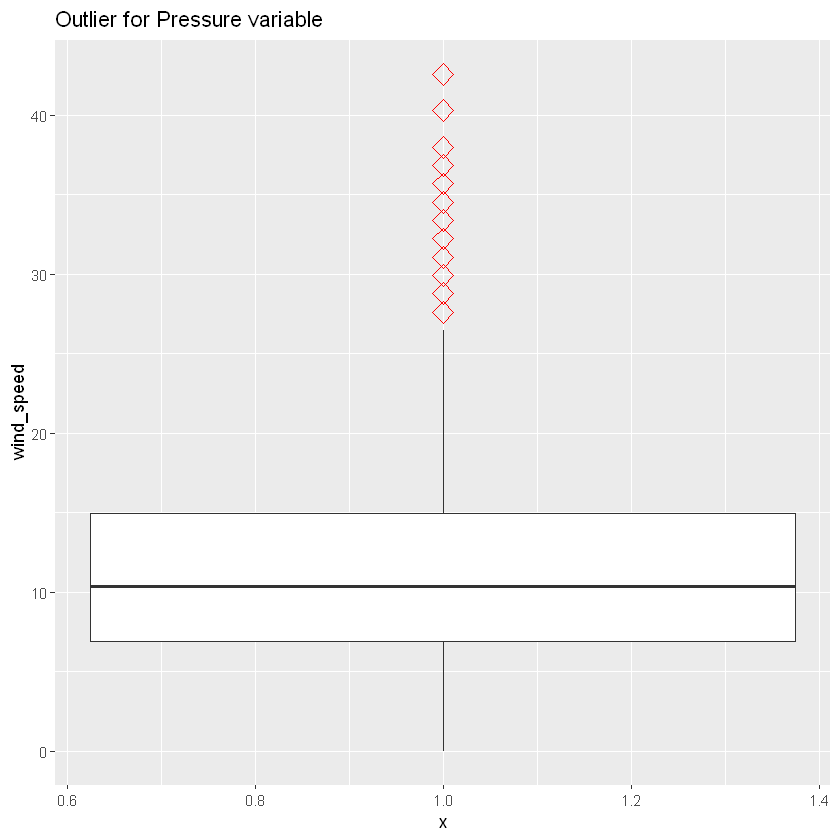

In [10]:
# checking the outlier for pressure
ggplot(Hourly_weather_data, mapping = aes(x = 1, y = wind_speed, fill = wind_speed)) + 
  geom_boxplot(outlier.colour = "red", outlier.shape = 5, outlier.size = 4)+
  labs(title="Outlier for Pressure variable")

In [11]:
# removing the outlier inside pressure column
outlier_norm <- function(x){
  qntile <- quantile(x, probs=c(.25, .75))
  caps <- quantile(x, probs=c(.05, .95))
  H <- 1.5 * IQR(x, na.rm = T)
  x[x < (qntile[1] - H)] <- caps[1]
  x[x > (qntile[2] + H)] <- caps[2]
  return(x)
}

Warning message:
"Removed 3 rows containing missing values (geom_segment)."
Warning message:
"Removed 3 rows containing missing values (geom_point)."


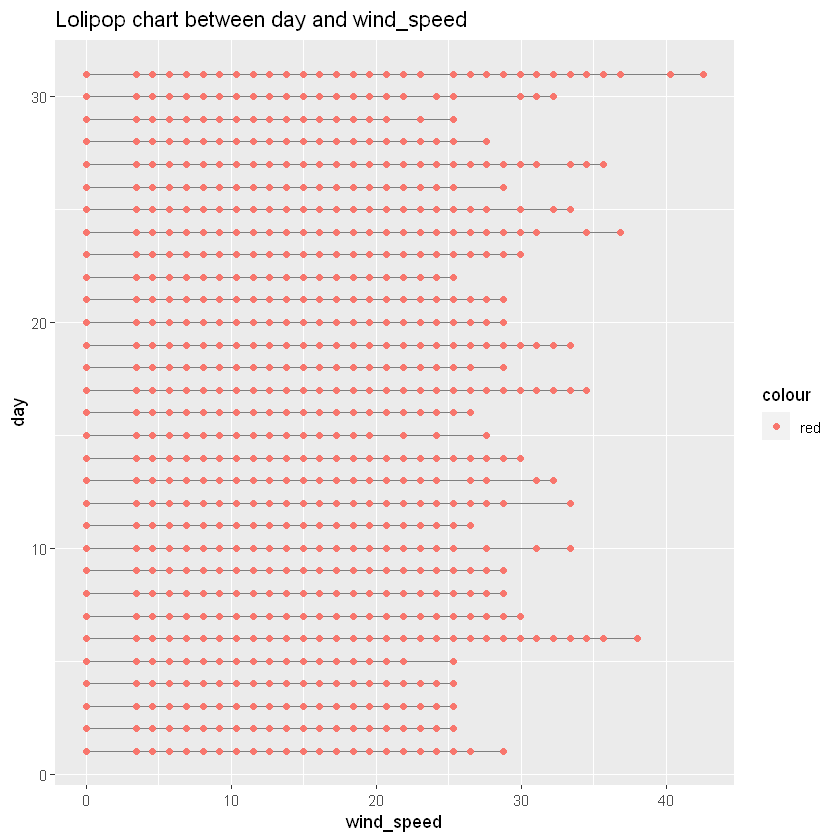

In [12]:
# Lolipop chart between day and wind_speed
ggplot(Hourly_weather_data, aes(wind_speed, day, color = "red")) +
  geom_segment(aes(x = 1, y = day, xend = wind_speed, yend = day), color = "grey50") +
  geom_point()+ labs(title = "Lolipop chart between day and wind_speed")

In [13]:
# Histogram for wind_gust
theme_set(theme_classic())+ filter(Hourly_weather_data, month = 3, day = 10)
g <- ggplot(Hourly_weather_data, aes(wind_gust)) + scale_fill_brewer(palette = "Spectral")
g + geom_histogram(aes(fill=wind_gust), 
                   binwidth = .1, 
                   col="orange", 
                   size=.1) +  # change binwidth
  labs(title="Histogram with Auto Binning",
       subtitle="Histogram for wind_gust ")

ERROR: Error in filter(Hourly_weather_data, month = 3, day = 10): unused arguments (month = 3, day = 10)


In [14]:
g + geom_histogram(aes(fill=wind_gust), 
                   bins=5, 
                   col="red", 
                   size=.1) +   # change number of bins
  labs(title="Histogram for wind_gust") 

ERROR: Error in eval(expr, envir, enclos): object 'g' not found


Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"
Warning message:
"Removed 204 rows containing non-finite values (stat_boxplot)."


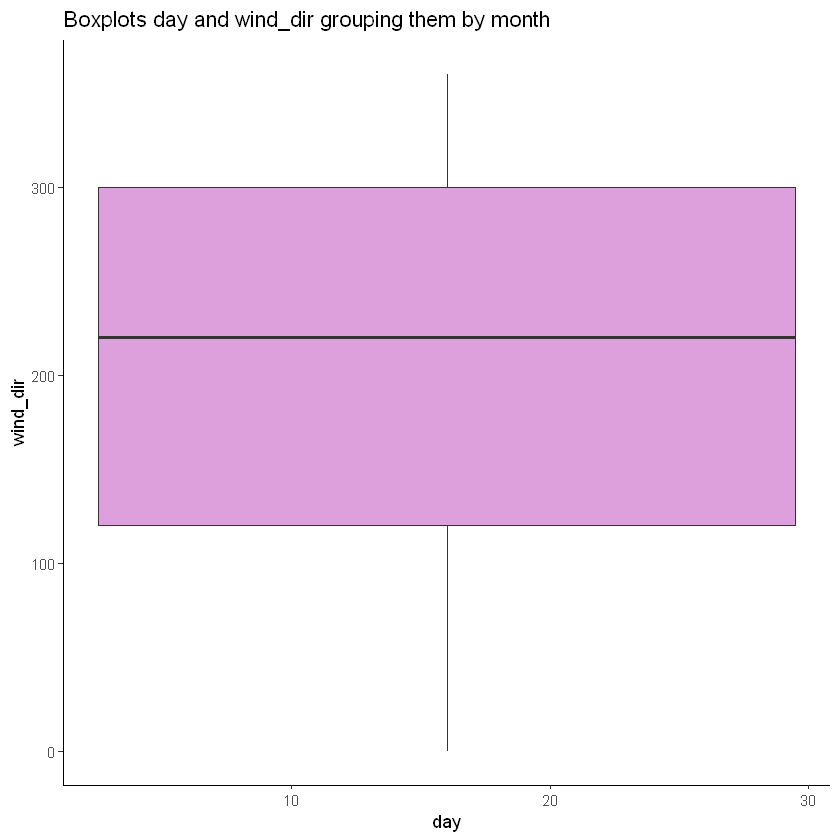

In [15]:
# BoxPlot between day and wind_dir grouping by month.
theme_set(theme_classic())
g <- ggplot(Hourly_weather_data, aes(x=day, wind_dir,grouping(month)))
g + geom_boxplot(varwidth=T, fill="plum") + 
  labs(y="wind_dir")+ 
  labs(title="Boxplots day and wind_dir grouping them by month")

In [16]:
# creating new column to get good information about the temperature
Hourly_weather_data$temp_status <-
  ifelse(Hourly_weather_data$temp >= 0 & Hourly_weather_data$temp <= 20, 'low',
         ifelse(Hourly_weather_data$temp >=20 & Hourly_weather_data$temp <=30, 'medium',
                ifelse(Hourly_weather_data$temp >=30, 'High', ' High')))


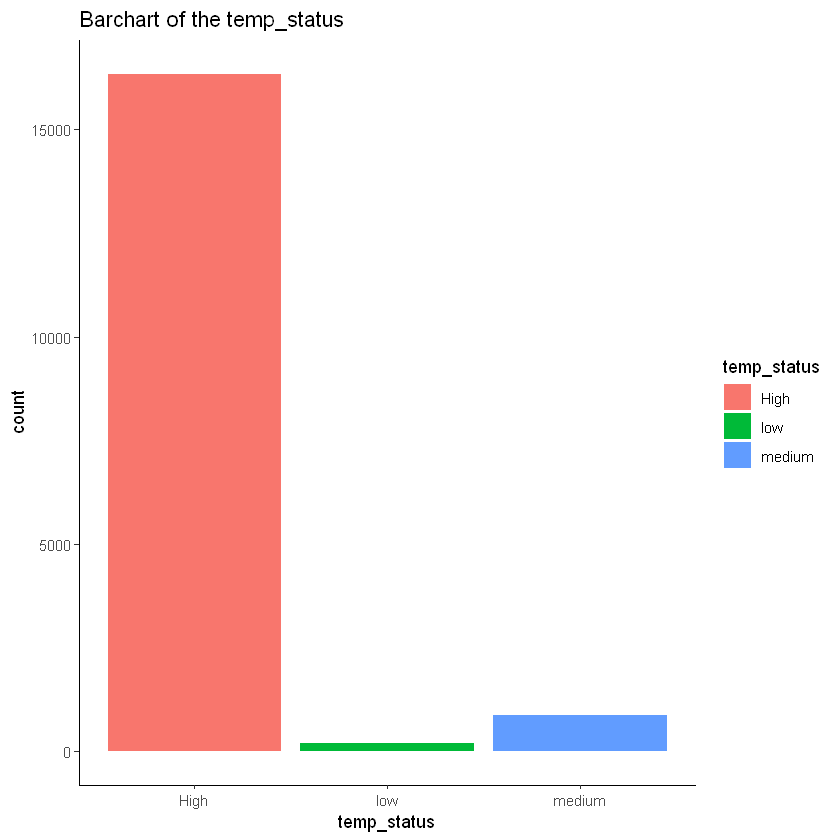

In [17]:
# Barchart of the temp_status
ggplot(data = Hourly_weather_data,aes(x= temp_status,fill = temp_status))+ 
  geom_bar()+ 
  labs(title = "Barchart of the temp_status")

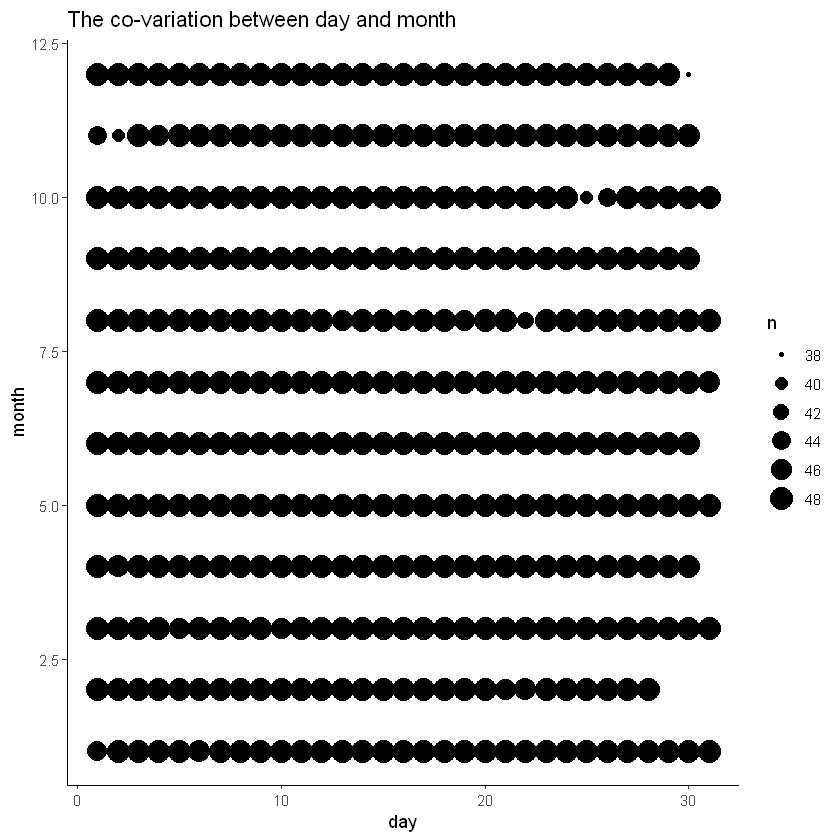

In [18]:
# count plot between day and month
ggplot(Hourly_weather_data, aes(x = day, y = month)) + 
  geom_count() +
  labs(title="The co-variation between day and month",
       x="day", y="month")

Warning message:
"Removed 3 row(s) containing missing values (geom_path)."


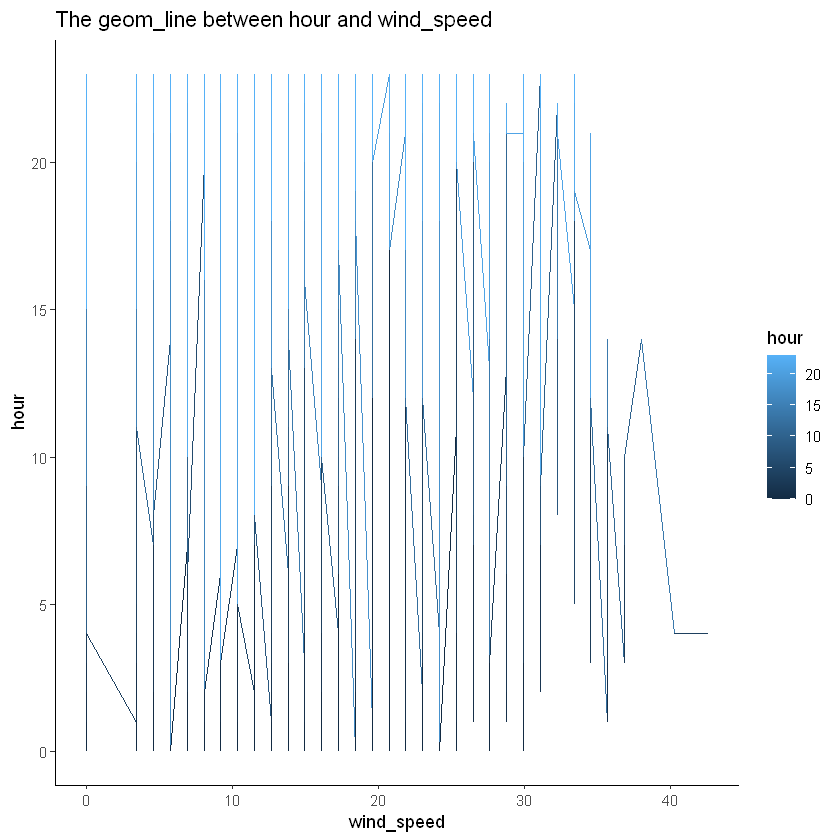

In [19]:
# Line between hour and wind_speed
Mitty <- ggplot(Hourly_weather_data, aes(x = wind_speed, y = hour ))
Mitty + geom_line(aes(color = hour))+ 
  labs(title = "The geom_line between hour and wind_speed")

Warning message:
"Using size for a discrete variable is not advised."


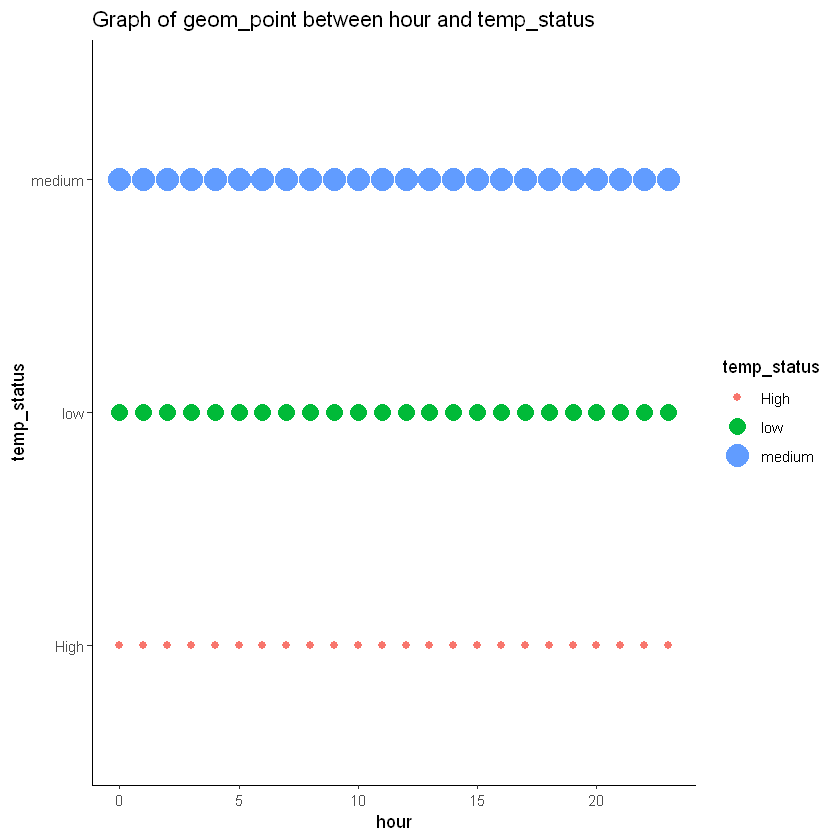

In [20]:
# geom_point between hour and temp_status
ggplot(Hourly_weather_data, aes(x = hour, y = temp_status)) +
  geom_point(aes(color = temp_status, size = temp_status))+
  labs(title = "Graph of geom_point between hour and temp_status ")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



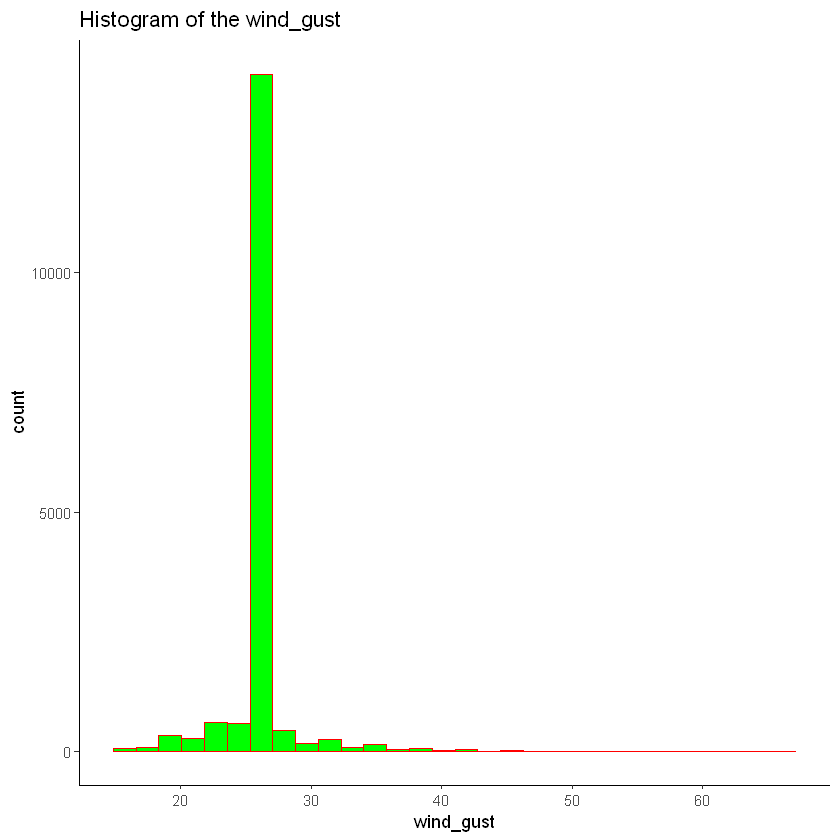

In [21]:
# Histogram of the wind_gust using color
ggplot(data=Hourly_weather_data, aes(x=wind_gust, 
                                     origin = "LGK", 
                                     day = 20)) + 
  geom_histogram(col="red", fill="green")+
  labs(title = "Histogram of the wind_gust ")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



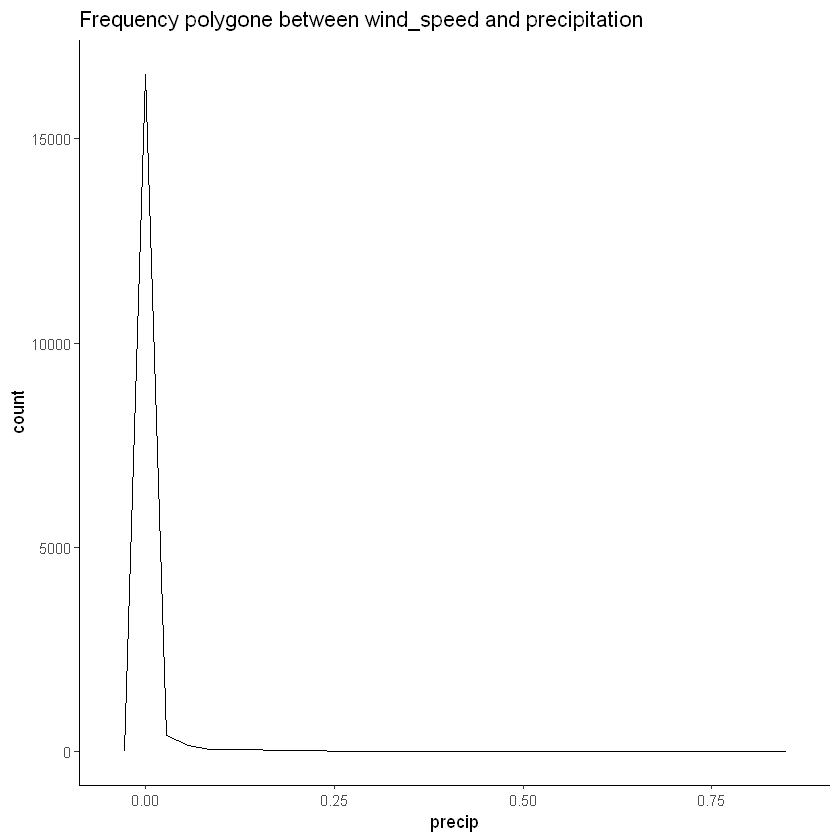

In [22]:
# the frequency polygone between wind_speed and precipitation
ggplot(Hourly_weather_data, aes(precip, colour = wind_speed)) +
  geom_freqpoly()+ 
  labs(title = "Frequency polygone between wind_speed and precipitation")

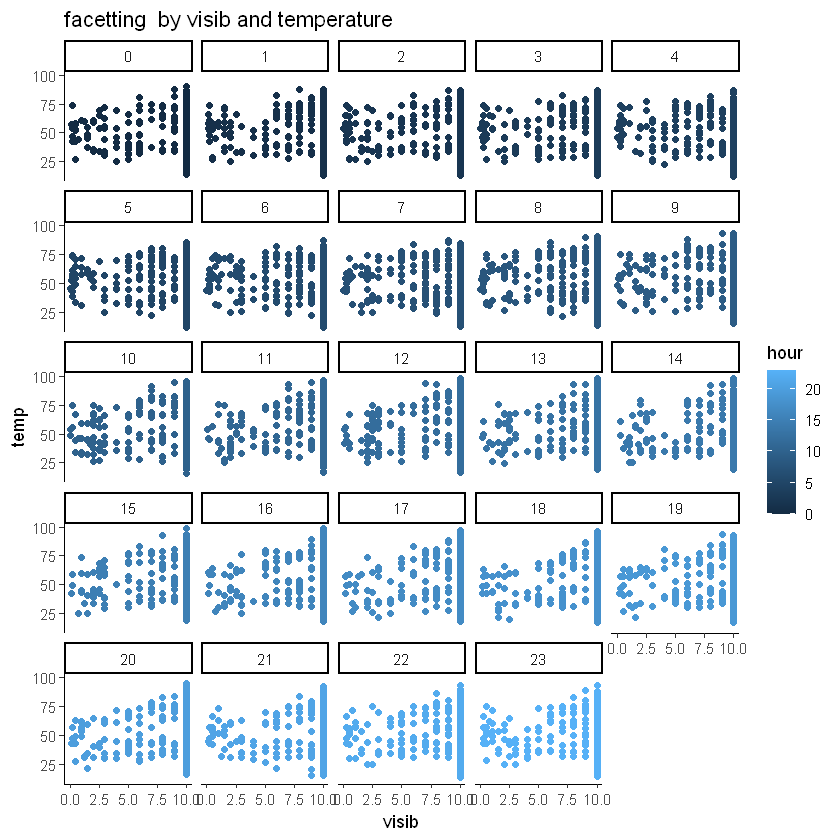

In [23]:
# facetting  by visib and temperature with color
ggplot(Hourly_weather_data, aes(x=visib, y=temp, color=hour)) + 
  geom_point() + 
  facet_wrap(~hour) + labs(title = "facetting  by visib and temperature")

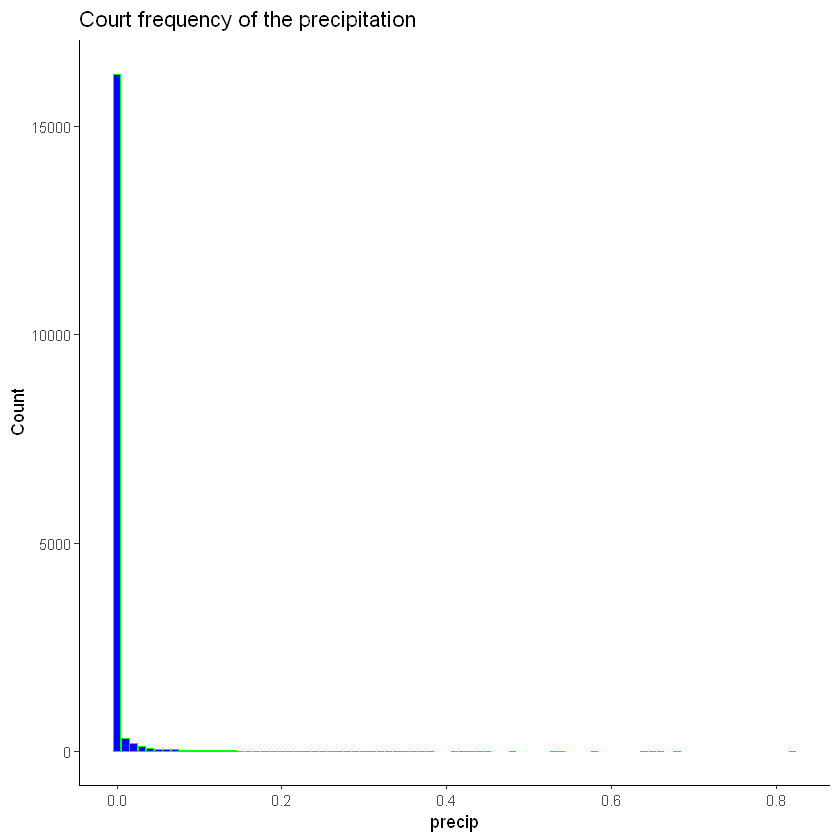

In [24]:
# Court frequency
ggplot(Hourly_weather_data, aes(x = precip, fill = precip)) + 
  geom_bar(col = "green", fill = "blue")+ 
  ylab("Count") + xlab("precip")+
  labs(title = "Court frequency of the precipitation")

Scatterplot 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



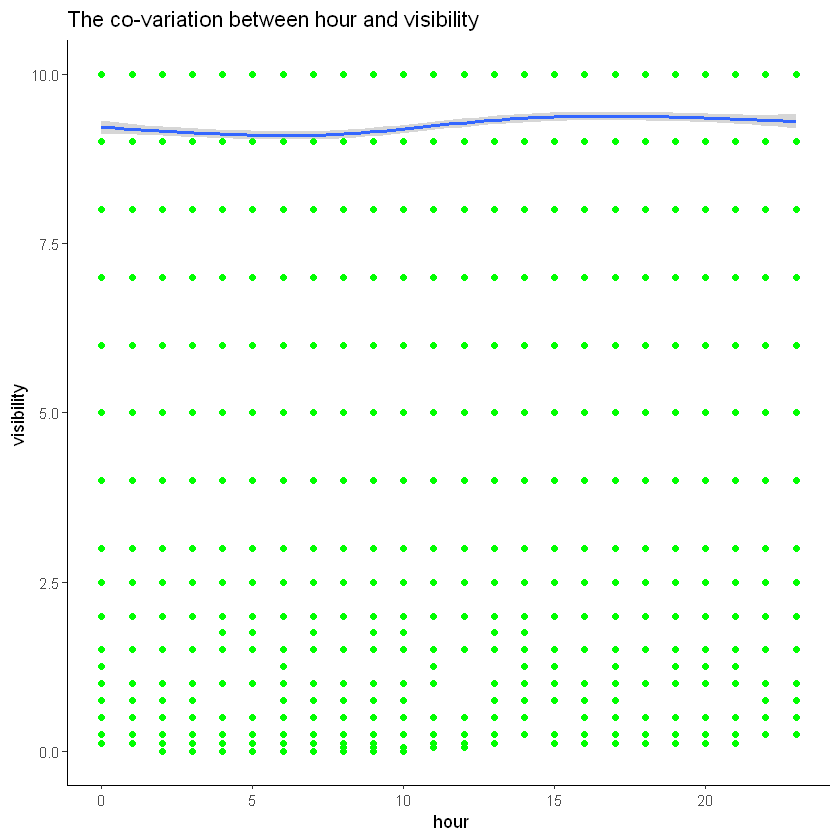

In [25]:
#The co-variation between hour and visibility
ggplot(Hourly_weather_data, aes(x=hour, y=visib)) + 
  geom_point(col = "green", fill= "blue") + 
  geom_smooth()+
  labs(title="The co-variation between hour and visibility", x=" hour", y="visibility ")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



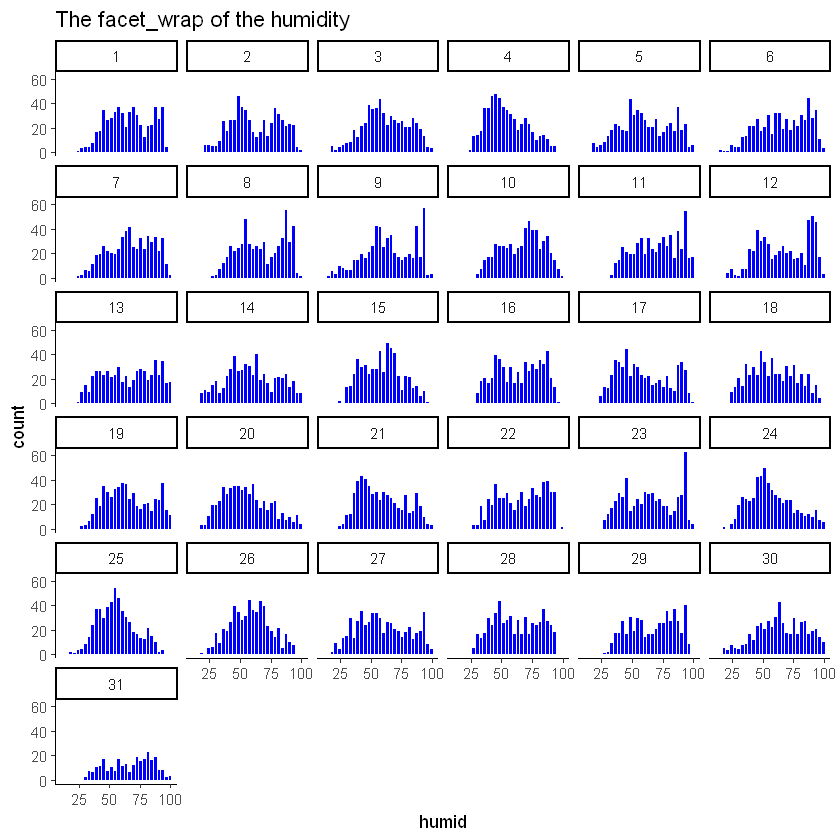

In [26]:
# facetting of the humidity for the all days
ggplot(Hourly_weather_data, aes(x=humid)) + 
  geom_histogram(col = "white", fill = "blue") +
  facet_wrap(~day)+
  labs(title = "The facet_wrap of the humidity")

Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."


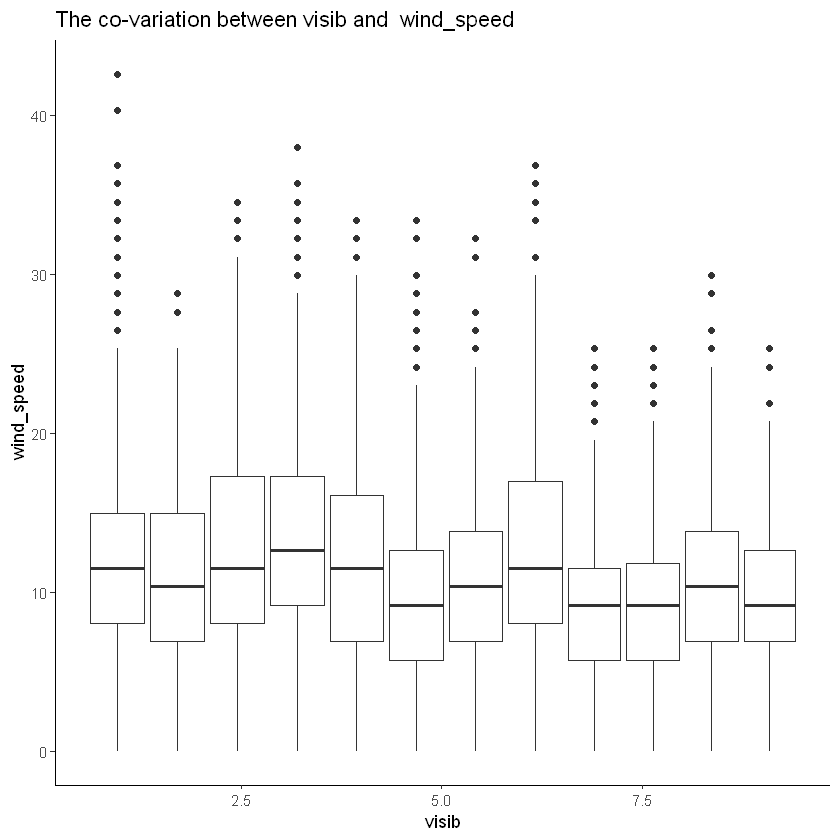

In [27]:
# box plot between wind_speed and visib
ggplot(Hourly_weather_data, aes(group=month ,x = visib, y = wind_speed)) + 
  geom_boxplot() +
  labs(title="The co-variation between visib and  wind_speed", 
       x="visib", y="wind_speed")